# Notebook training - Rete Neurale

In [22]:
!pip install -r requirements.txt

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# LEGGO I FILE DI TEST E DI TRAINING E LI METTO IN DUE DATAFRAME
attacchi_cardiaci_training = pd.read_csv('training.csv')
attacchi_cardiaci_test = pd.read_csv('test.csv')

In [35]:
# PREPARO I VALORI DI USCITA PER IL TRAINING DEL MODELLO

output_labels_training = pd.get_dummies(attacchi_cardiaci_training['DEATH_EVENT'].values).to_numpy()
output_labels_test = pd.get_dummies(attacchi_cardiaci_test['DEATH_EVENT'].values).to_numpy()
output_labels_test.shape

(59, 2)

In [36]:
#CANCELLO LE PRIME DUE COLONNE CHE NON SONO FEATURES

attacchi_cardiaci_training = attacchi_cardiaci_training.drop(attacchi_cardiaci_training.columns[[0,1]], axis=1).to_numpy()
attacchi_cardiaci_test = attacchi_cardiaci_test.drop(attacchi_cardiaci_test.columns[[0,1]], axis = 1).to_numpy()

In [37]:
# USO UNO SCALER CHE MI PORTA TUTTI I VALORI VICINI TRA DI LORO NEL RANGE [0,1]

scaler = MinMaxScaler()
scaler.fit(attacchi_cardiaci_training)
attacchi_cardiaci_training = scaler.transform(attacchi_cardiaci_training)

scaler.fit(attacchi_cardiaci_test)
attacchi_cardiaci_test = scaler.transform(attacchi_cardiaci_test)

In [38]:
def initializerFirstLevel():
    return np.random.randn(12,5) / np.sqrt(12);

def initializerSecondLevel():
    return np.random.randn(5,2) / np.sqrt(5);

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [39]:
learn_rate = 0.1

In [40]:
np.shape(attacchi_cardiaci_training)

(179, 12)

In [41]:
def fit(dataset):
    
    x_train = dataset['data']
    
    y_train = dataset['outputs']
    
    # UTILIZZO IL METODO XAVIER PER L'INIZIALIZZAZIONE DEI PESI

    w1 = initializerFirstLevel()
    w2 = initializerSecondLevel()

    errors = []

    for i in range(1000):
    
        #FUNZIONI DI ATTIVAZIONE SU PESI MOLTIPLICATI PER INGRESSI
        out1 = sigmoid(x_train.dot(w1))
        out2 = sigmoid(out1.dot(w2))
    
        #USCITA REALE MENO USCITA PREDETTA
        error2 = y_train - out2
        gradient2 = error2 * sigmoid_deriv(out2)
    
        error1 = gradient2.dot(w2.T)
        gradient1 = error1 * sigmoid_deriv(out1)
    
        #AGGIORNAMENTO PESI
        w2 += learn_rate * out1.T.dot(gradient2)
    
        # RETROPROPAGAZIONE W * X, NELLA RETROPROPAGAZIONE IN CASO DI MOLTIPLICAZIONE, VALE LA REGOLA DELLO SCAMBIO, E W = GRADIENTE
        # DELL'USCITA PER L'ALTRO INGRESSO DELLA MOLTIPLICAZIONE NEL GRAFO
        w1 += learn_rate * x_train.T.dot(gradient1)
    
        #CALCOLO RSS 
        total_error = np.mean(np.square(error2))
    
        #AGGIUNGO ERRORE A LISTA PER IL PLOT
        errors.append(total_error)
        aux = 1 - total_error
        accuracy = round((1 - total_error) * 100)
    
    return (errors,accuracy)
    
    
def score(dataset, tipo_dataset):
    
    errors,accuracy = fit(dataset)
    label = ''
    if tipo_dataset == 1:
        label = 'training'
    else:
        label = 'test'
    plt.plot(errors, label=label)
    plt.legend()
    return (errors,accuracy)

ACCURACY TRAINING: 90.000000
ACCURACY TEST: 94.000000


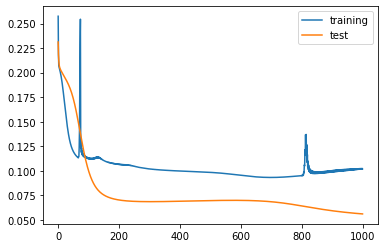

In [45]:
datasetTraining = {'data': attacchi_cardiaci_training, 'outputs': output_labels_training}
datasetTest = {'data': attacchi_cardiaci_test, 'outputs': output_labels_test}
error_train, accuracy_train = score(datasetTraining, 1)
error_test, accuracy_test = score(datasetTest, 0)
print('ACCURACY TRAINING: %f' % accuracy_train)
print('ACCURACY TEST: %f' % accuracy_test)